In [79]:
library(car)
library(lmtest)
library(sandwich)
data = read.csv('C:/Users/rinta/koulu/birthweight.csv', sep=";")

model = lm(birthweight ~ alcohol, data=data)
summary(model)


Call:
lm(formula = birthweight ~ alcohol, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2960.7  -323.7    44.3   374.3  3462.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3385.70      10.99  308.03   <2e-16 ***
alcohol      -144.65      79.05   -1.83   0.0674 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 596.2 on 2998 degrees of freedom
Multiple R-squared:  0.001116,	Adjusted R-squared:  0.0007823 
F-statistic: 3.348 on 1 and 2998 DF,  p-value: 0.06738


## A)
Raskausaikana alkoholia käyttävät naiset saavat arviolta 144 grammaa kevyempiä lapsia kuin alkoholia käyttämättömät. Keskimääräinen virhe on noin 80 grammaa ja selitysaste vain 0.1%. On syytä huomata ettei tulos pokkea nollasta 95% merkitsevyystasolla.


In [80]:
model2 = lm(birthweight ~ alcohol + educ, data=data)
summary(model2)


Call:
lm(formula = birthweight ~ alcohol + educ, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2959.9  -315.4    32.8   365.0  3425.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3268.151     65.914  49.582   <2e-16 ***
alcohol     -145.336     79.022  -1.839   0.0660 .  
educ           9.107      5.035   1.809   0.0706 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 596 on 2997 degrees of freedom
Multiple R-squared:  0.002205,	Adjusted R-squared:  0.001539 
F-statistic: 3.311 on 2 and 2997 DF,  p-value: 0.03662


## B)
Vakio pienenee, mikä merkitsee että vähän koulutetut ja alkoholia käyttävät naiset saavat kevyempiä lapsia kuin mitä kaikkien alkoholia käyttävien naisten keskiarvo on. Saman voi päättellä myös koulutustason positiivisesta kertoimesta, joka merkitsee koulutusvuosien nostavan lapsen painoa (9g per vuosi). Molempien mertoimien p-arvo on matala eikä tilastollisesti merkitsevä ja mallin selitysaste on yhä alhainen.

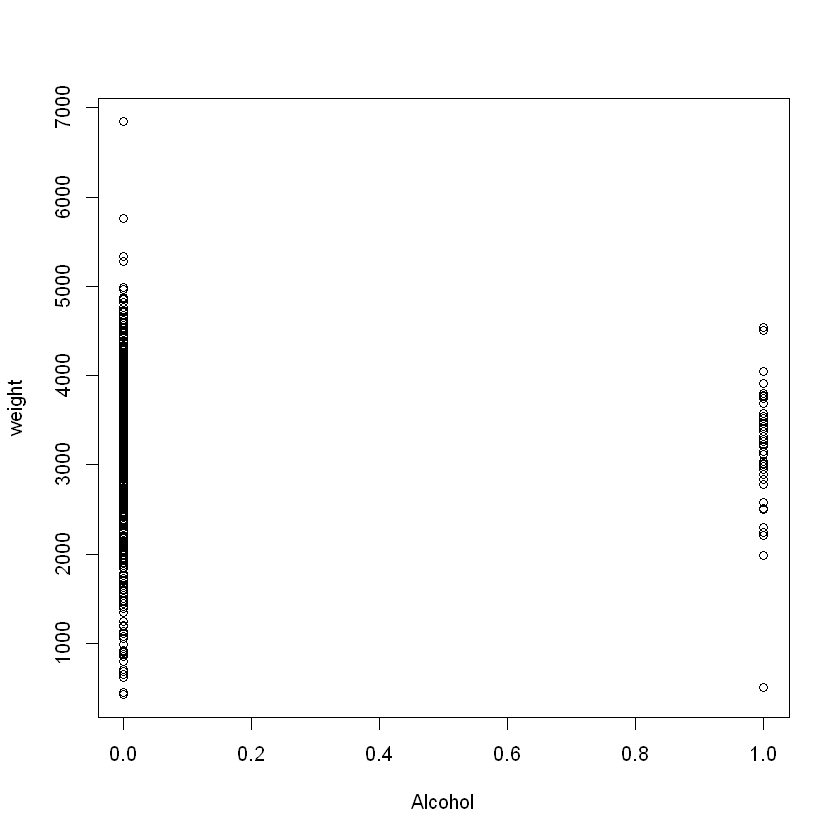

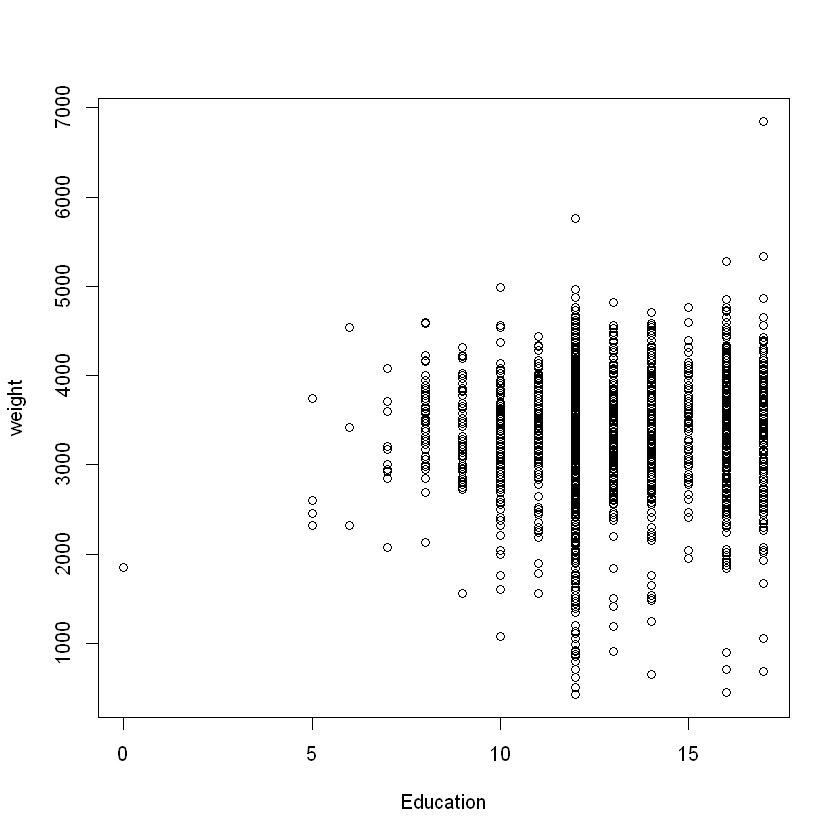

In [81]:
plot(data[,"alcohol"],data[,"birthweight"],
   xlab="Alcohol", ylab="weight")

plot(data[,"educ"],data[,"birthweight"],
   xlab="Education", ylab="weight")

## C)
Havaintoja:
- yksi kevyt täysin kouluttautumattomalla äidillä sekä yksi todella painava laspi alkoholia käyttämättömällä ja todella koulutetulla äidillä. Selkeät outlier -> voi vääristää kertoimia
- näyttää liki homoskedastiselta


In [70]:
cleaned = filter(data, birthweight < 6500, educ > 4)
cleaned_model = lm(birthweight ~ alcohol + educ, data=cleaned)
coeftest(cleaned_model, vcov = vcovHC(cleaned_model, type="HC1"))




t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3297.6111    65.3436 50.4657  < 2e-16 ***
alcohol     -144.4824    81.8224 -1.7658  0.07753 .  
educ           6.7723     5.0309  1.3461  0.17836    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## D)
Kun outlierit poistetaan ja tehdään robusti regressio, nähdään että koulutuksen vaikutus vähenee puolella ja sen p arvo on kaukana tilastollisesta merkitsevyydestä. Myös keskivirheet kasvavat.


In [82]:
linearHypothesis(cleaned_model, c("alcohol=0", "educ=0"), test=c("F"),vcov = vcovHC(cleaned_model, type="HC1"))

Res.Df,Df,F,Pr(>F)
2997,NA,NA,NA
2995,2,2.462623,0.08538365


Kriittinen arvo olisi 3 joten nollahypoteesia ei voida hylätä

In [84]:
model2 = lm(birthweight ~ alcohol + educ + nprevist, data=cleaned)
summary(model2)


Call:
lm(formula = birthweight ~ alcohol + educ + nprevist, data = cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-2694.35  -304.87    30.32   368.92  2229.94 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2898.669     71.458  40.565   <2e-16 ***
alcohol     -102.963     76.569  -1.345    0.179    
educ           6.456      4.907   1.316    0.188    
nprevist      36.594      2.872  12.743   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 576.9 on 2994 degrees of freedom
Multiple R-squared:  0.05308,	Adjusted R-squared:  0.05213 
F-statistic: 55.95 on 3 and 2994 DF,  p-value: < 2.2e-16


## E)
Lääkärikäyntien lisäys teki mallin selitysasteesta moninkeratisesti paremman. Käyntien lukumäärän kertoimen p arvo on pieni ja käyntien määrä onkin taatusti tilastollisesti merkittävä estimaattori. Alkoholin merkitys väheni enstisestään mikä kertoo alkoholin ja lääkärikäyntien korrelaatiosta keskenään. 

In [85]:
linearHypothesis(model2, c("alcohol=0", "educ=0"), test=c("F"),vcov = vcovHC(model2, type="HC1"))

Res.Df,Df,F,Pr(>F)
2996,NA,NA,NA
2994,2,1.782351,0.1684206


In [ ]:
Nolla hypoteesia ei voida taaskaan hylätä. Testi antaa entistä huonomman tuloksen. 
Aakoholin ja koulutuksen vaikutusta ei voida pitää merkittävinä estimaattoreina ja 
täten malli jossa painoa arvoidaan pelkällä alkohollilla ja koulutuksella ei voida pitää luotetavana